<h1> Dataset <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> The definition of attrition is in Oxford’s English dictionary defined as: <br> <i><b> "the gradual reduction of a workforce by employees leaving and not being replaced rather than by redundancy." </i></b>

The chosen business case for this course is based on the dataset “Employee Attrition”, which consists of 35 columns and approximately 1400 rows of data about an organization’s employees. 
The dataset is found on the website “Kaggle.com” in a notebook. The goal of this business case is to find patterns in the data using analysis that can tell us why workers quit their job. Moreover the dataset consists of labeled data, which makes it very relevant to perform classification training and prediction on the data using R programming language.
</h4>

<h1> BProblem question <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> 
The business question we want to answer in this project is based on the attrition data and interest in the issue of employees leaving their jobs. This knowledge is relevant for the company as a strong decision foundation to either prevent employees from leaving or start a hiring process. Out concrete problem-question is therefore as follows:

<br><i>To what extent do employees in a company quit their jobs based on parameters such as distance from home, monthly salary and job satisfaction?</i>

In the following we further describe how we are planning to give an answer to the question above. As our dataset contains many columns we have chosen to select the most relevant ones and tried to build a model that is able to somewhat accurately define attrition based on those chosen parameters. The purpose of this would be vital in a company setting as an organization can prepare for workforce loss by using data similar to our dataset about their employees.
</h4>

<h1> Exploratory data analysis<h1>
<h4> To get a better understanding of the data 


<h4>

In [103]:
# git_url <- "https://github.com/Hammi007/R_bigdata/blob/3e35e40e35a28f7e460bac125f9b63384c1cc4f3/Employee_Attrition.csv"
# data <- read.csv(git_url, header = TRUE, stringsAsFactors = FALSE)
df <- read.csv("Employee_Attrition.csv", header = TRUE, stringsAsFactors = FALSE, strip.white = TRUE)


<h2> Exploring the basics of the dataset <h2>


In [104]:
#We see that the dataset contains 1470 rows and 35 coloumns.
dim(df)

# Through the str() function we see the different datatypes and can conclude that, only two datatypes are used: int and chr.
str(df)

# This also applies for columns with binary output eg. 'Attrition' with "yes"/"no" values, or columns a few multiple values eg BusinessTravel with three diffent values.
unique(df$BusinessTravel)

# In the dataset we also see, that there is no missing values NA.
table(is.na(df))

[1] 1470   35

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

[1] "Travel_Rarely"     "Travel_Frequently" "Non-Travel"


FALSE 
51450 

<h2> Cleaning the data <h2>
<h4> After exploring the overall structure of the data, we want to conduct the following transformation-steps: <br><br>
    <i>
        step 1: Remove irrelevant columns<br>
        step 2: Remove quotation ("") from the dataset <br>
        step 3: Transforming columns whith binary and a multiple values to factors.<br> 
    <i>
<h4>

In [105]:
#Step 1: Keeping a selection of relevant columns
selection <- c(
    "Age", "Attrition", "BusinessTravel", "DistanceFromHome", 
    "EducationField", "EnvironmentSatisfaction","Gender","HourlyRate",
    "JobInvolvement", "JobRole", "JobSatisfaction", "MaritalStatus",
    "MonthlyIncome", "NumCompaniesWorked", "OverTime", "RelationshipSatisfaction",
    "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",	"YearsInCurrentRole",
    "YearsSinceLastPromotion"
)
df <- df[selection]

#Step 2,3: Converting multivalues to factors and remvoving quotation ""
df$Attrition <- factor(df$Attrition, levels = c("Yes", "No"), labels = c("Yes", "No"))
df$BusinessTravel <- factor(df$BusinessTravel, levels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"),
                            labels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"))
df$EducationField <- factor(df$EducationField, levels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"), 
                            labels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"))
df$EnvironmentSatisfaction <- factor(df$EnvironmentSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4))
df$Gender <- factor(df$Gender, levels = c("Male", "Female"), labels = c("Male", "Female"))
df$JobInvolvement <- factor(df$JobInvolvement, levels = c(1,2,3,4), labels = c(1,2,3,4))
df$JobRole <- factor(df$JobRole, levels = c("Sales Executive","Research Scientist","Laboratory Technician",
                                            "Manufacturing Director","Healthcare Representative","Manager","Sales Representative",
                                            "Research Director","Human Resources"), 
                     labels = c("Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Sales Representative","Research Director","Human Resources"))
df$JobSatisfaction <- factor(df$JobSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4))
df$MaritalStatus <- factor(df$MaritalStatus, levels = c("Single","Married","Divorced"), labels = c("Single","Married","Divorced"))
df$OverTime <- factor(df$OverTime, levels = c("Yes", "No"), labels = c("Yes", "No"))
df$RelationshipSatisfaction <- factor(df$RelationshipSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4))
df$TrainingTimesLastYear <- factor(df$TrainingTimesLastYear, levels = c(0,1,2,3,4,5,6), labels = c(0,1,2,3,4,5,6))
#df$WorkLifeBalance <- factor(df$WorkLifeBalance, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)


<h2> Visualizing and understanding the data in depth <h2>
<h4> In this section we are using R-tools to furhter explore the data. Since our business case is havely based on attrition in a company, we will start with invenstigation the categorical value 'attrition' <br><br>
     
Attration is defines as: <i> "the gradual reduction of a workforce by employees leaving and not being replaced rather than by redundancy." <i> 
<!--
<br>
<br>
<br>
--> 
<i>
<h4>

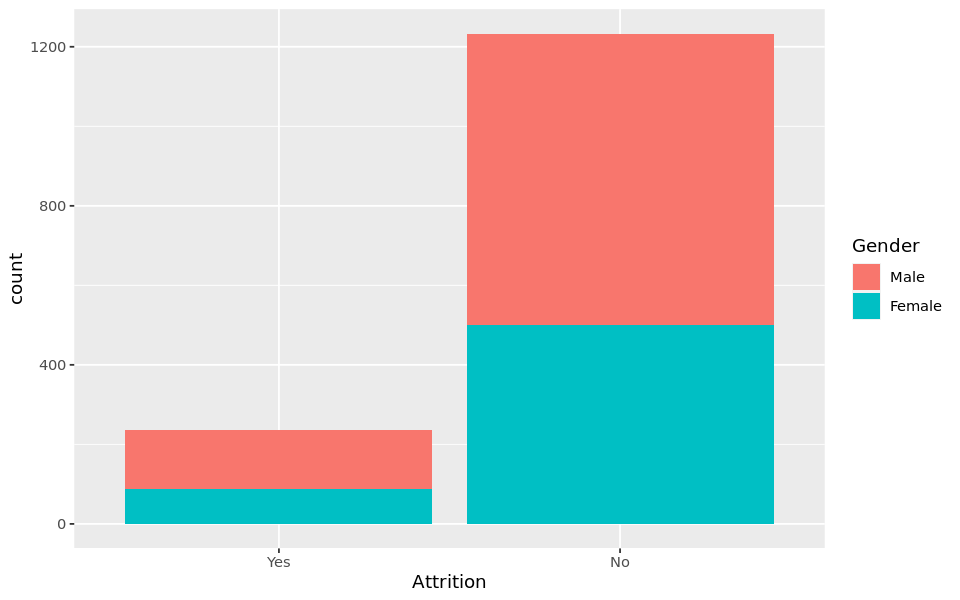

In [106]:
library(tidyverse); library(ggplot2)

options(repr.plot.width=8, repr.plot.height=5)

ggplot(df, aes(x = Attrition)) + geom_bar(aes(fill = Gender))

# Examening the value 'Attrition', we see that there is an imbalance as the majority of data can be found in the category 'no'.
# The dataset is skewed.

<h5>The plot above gives us an idea of what proportions the datasets entirty consists of based on Attrition. <br>We notice a skewness which we will consider in our future interpertations.<h5>
<h5 style="color:blue;">Also we will keep in mind the option to under/over sample the dataset for future classification purposes.<h5>

<h3>In the following we will try to further explore our data by visualizing: <br>
<h5>How does the following parameters influence the attrition:<h5>

<ul style = "">
  <li style = "margin-bottom: 10px;">DistanceFromHome</li>
  <li style = "margin-bottom: 10px;">JobSatisfaction</li>
  <li style = "margin-bottom: 10px;">MonthlyIncome</li>
</ul>


In [107]:
#Filter rows with attrition yes and no respectively:
df_yes <- filter(df, Attrition =='Yes')
df_no <- filter(df, Attrition =='No')

<h2>JobSatisfaction<h2>
<h4>In the following we see two visual representations of the Jobsatisfaction of the employees with Attrition: "No" and "Yes"<h4>

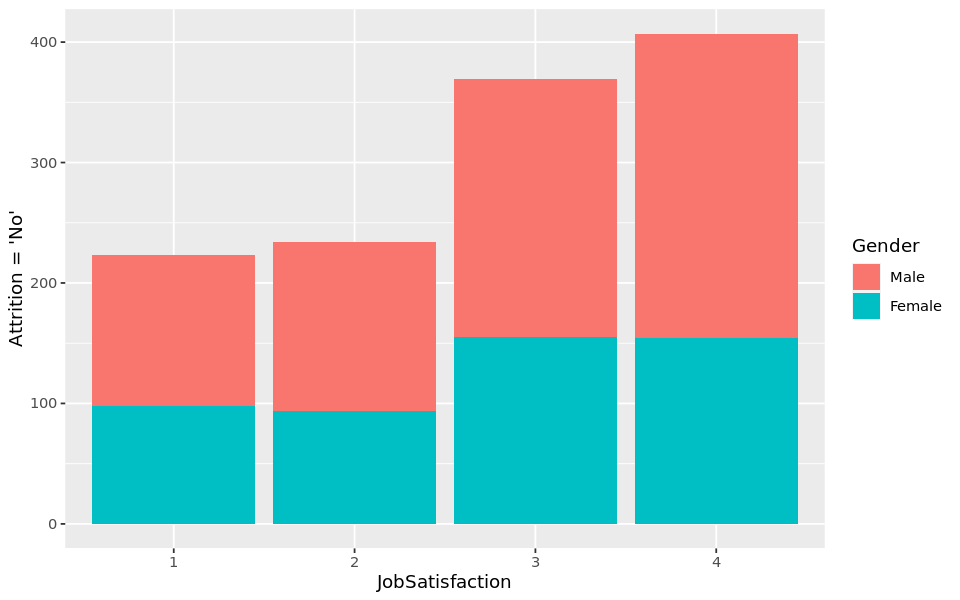

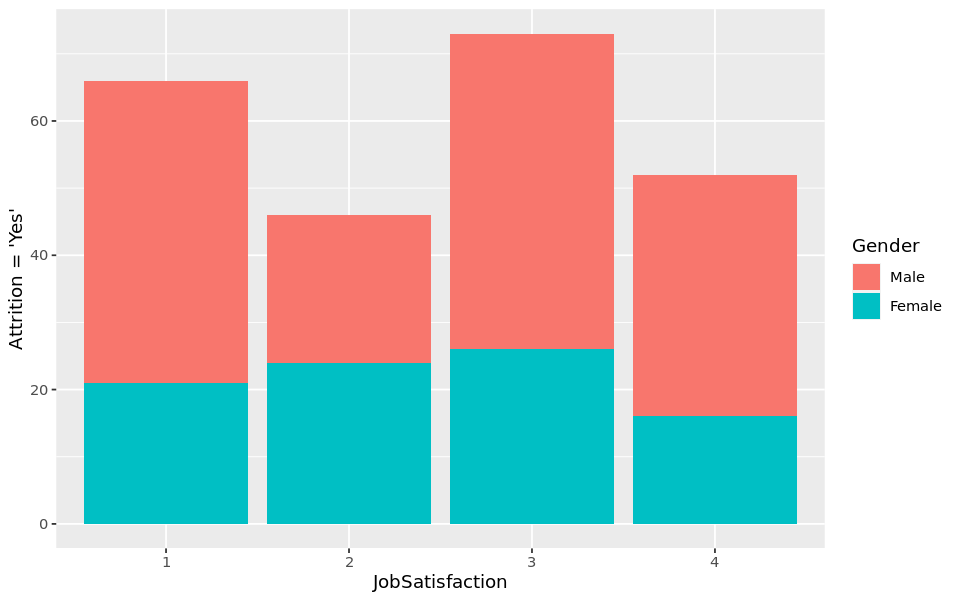

In [108]:
ggplot(df_no, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'")

<h2>DistanceFromHome<h2>
<h4>In the following we see two visual representations of the employees DistanceFromHome with Attrition: "No" and "Yes"<h4>

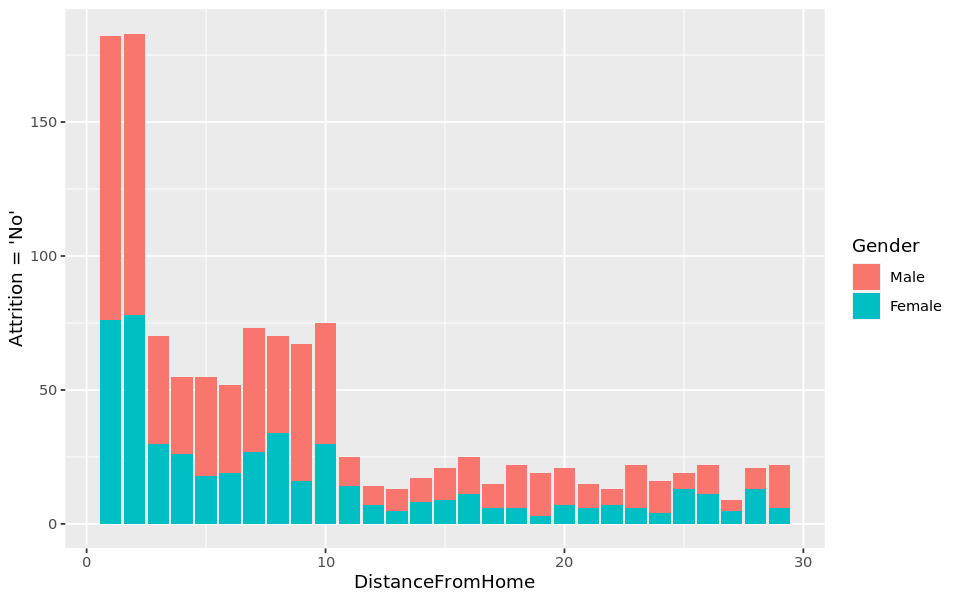

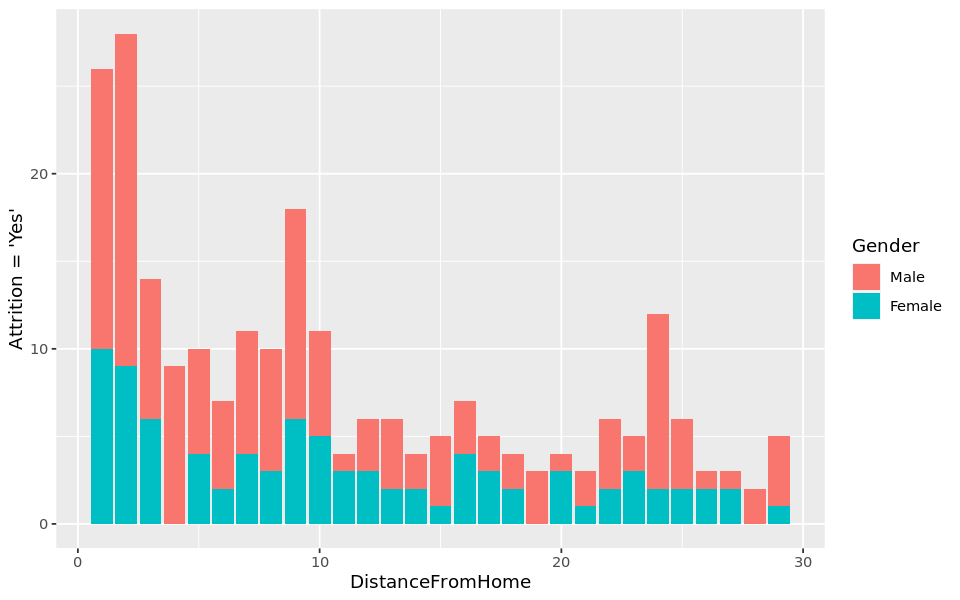

In [109]:
ggplot(df_no, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'")


<h2>MonthlyIncome<h2> 
<h4>In the following we see two visual representations of the employees MonthlyIncome with Attrition: "No" and "Yes"<h4>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


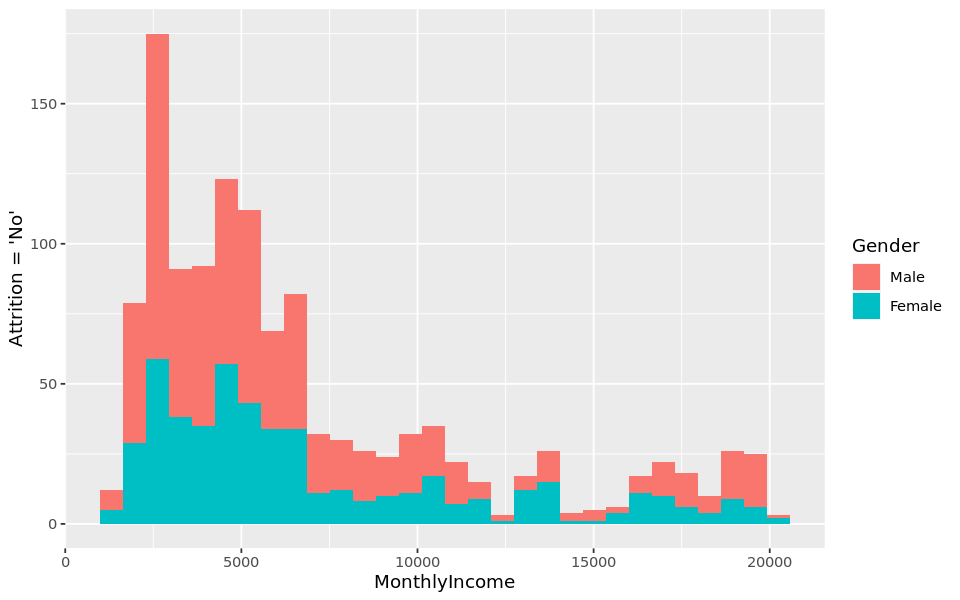

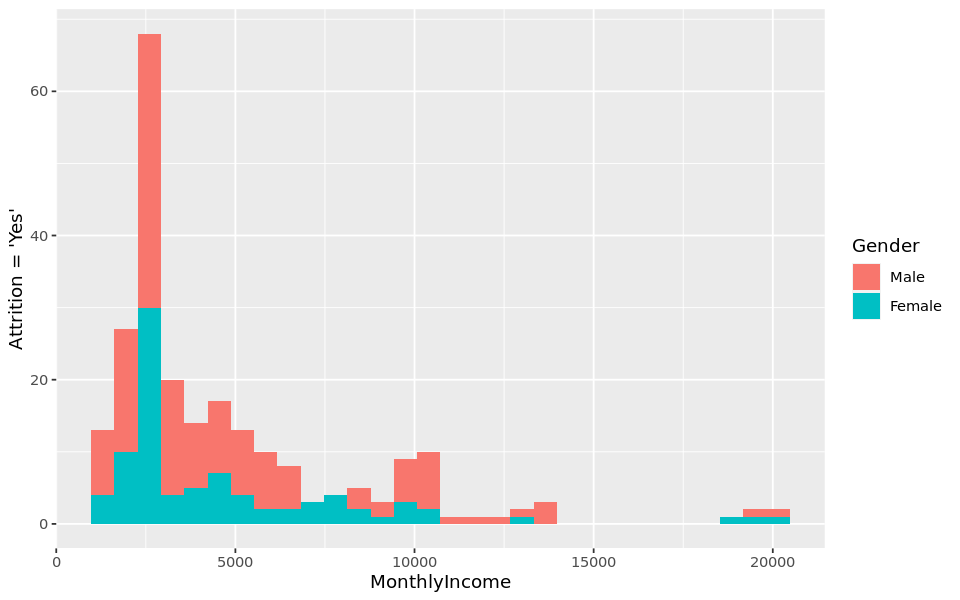

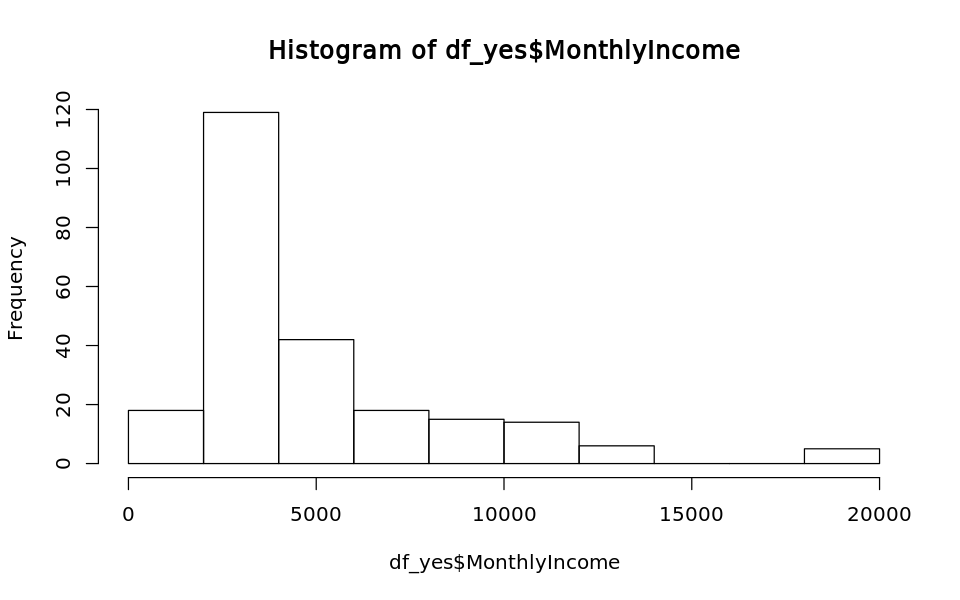

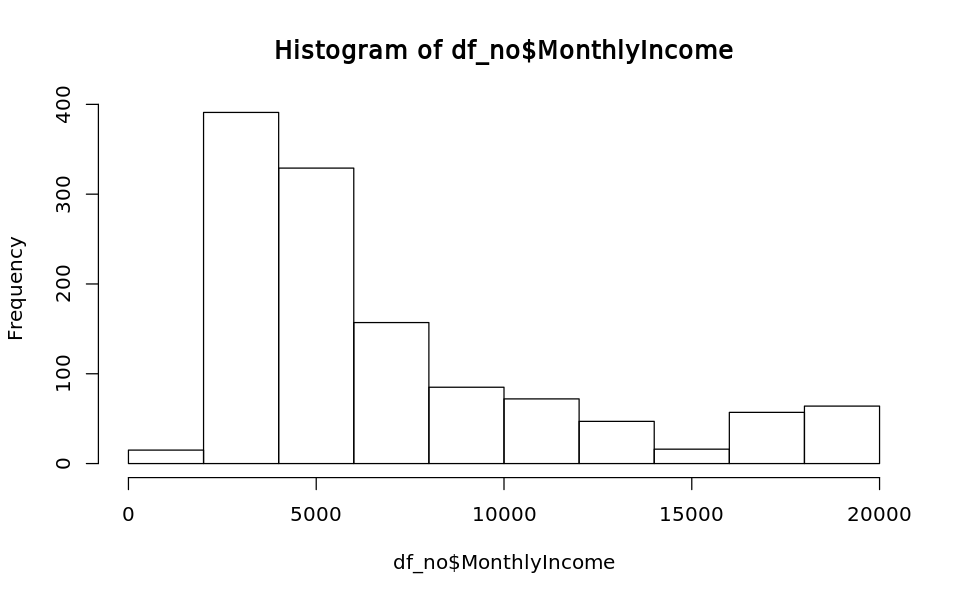

In [110]:
ggplot(df_no) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'Yes'")
hist(df_yes$MonthlyIncome)
hist(df_no$MonthlyIncome)

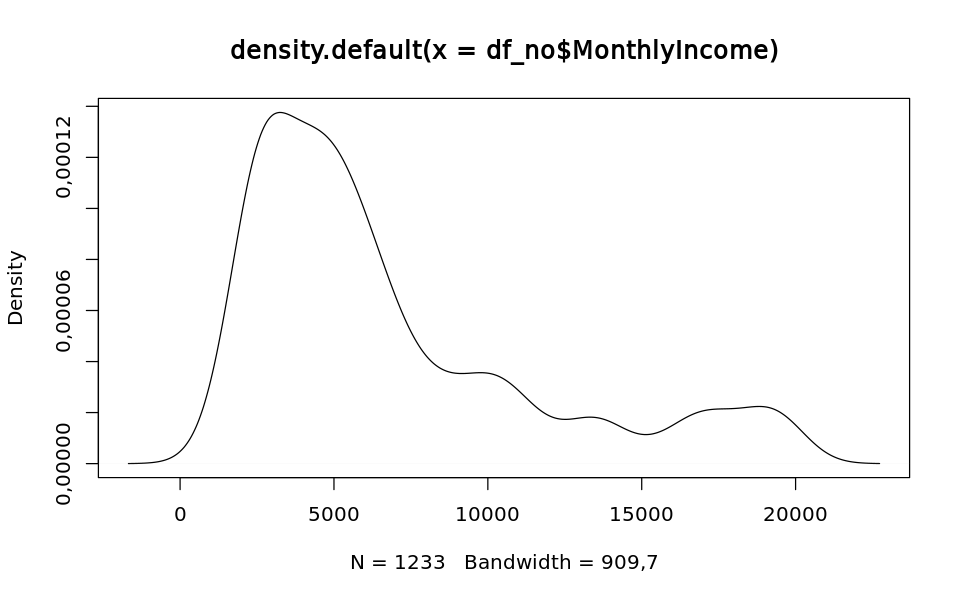

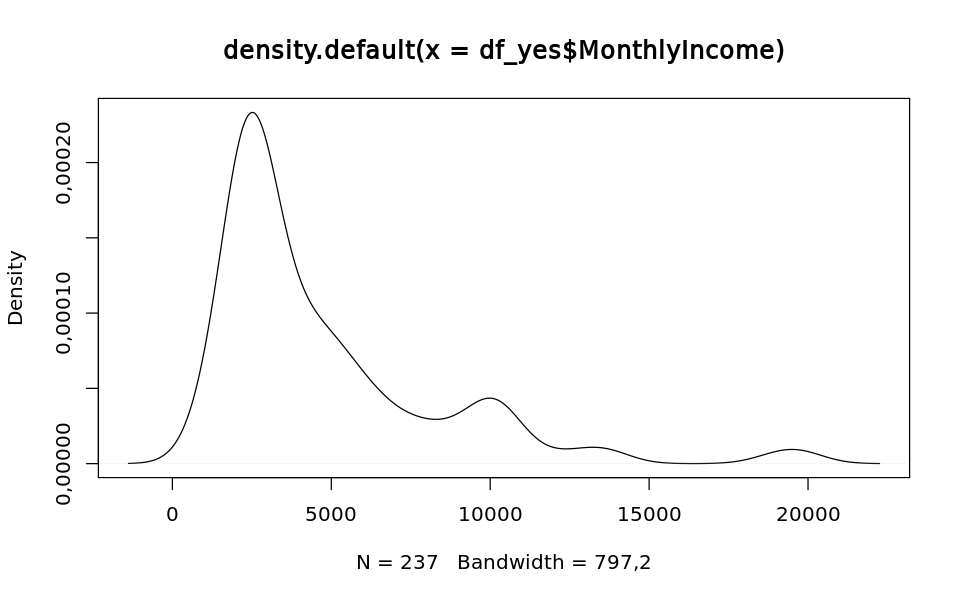

In [111]:
#Simple visualization of the distribution of MonthlyIncome
plot(density(df_no$MonthlyIncome))
plot(density(df_yes$MonthlyIncome))

<h1>Unsupervised learning - Classification<h1>
<h4 style = "line-height: 200%; font-weight: lighter;">
Supervised learning is a technique used in data science to use labeled data in order to learn to predict labels on similar data that is unseen by a given model. Supervised learning generalizes based on known labels about certain data and automates decision making processes based on predictions. Supervised learning consists of a training and testing process, where training is the phase of generating a model and testing is the process of applying the model to new unseen data also known as a test sample. The following will use supervised learning in order to attempt to give an answer to the business problem since the dataset includes labeled data.

<h4>

<h1>Train and test split<h1>
<h4 style = "line-height: 200%; font-weight: lighter;">
Train and test split
Train and test split prepares our data for classification training as we need to train a classifier on a training sample and then test its ability to predict on a training sample that the model has not yet seen. For the train and test split we use the following code in R programming language:

<h4>
    

In [112]:
# Installing the package
#install.packages("caTools")    # For Logistic regression
#install.packages("ROCR")       # For ROC curve to evaluate model   
# Loading package
library(caTools)

#Balancing data: (undersampling)
yes <- which(df$Attrition == 'Yes')
no <- which(df$Attrition == 'No')
no <- sample(no, length(yes))
df2 <- df[c(no,yes),] 
df2

#Converting Yes and No to 1 and 0:
df2$Attrition <- ifelse(df2$Attrition == 'Yes', 1, 0)

#Train/test split and Classification:
split <- sample.split(df, SplitRatio = 0.7)
   
train_reg <- subset(df2, split == "TRUE")
test_reg <- subset(df2, split == "FALSE")




,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1141,44,No,Travel_Rarely,7,Medical,2,Female,31,3,Research Director,...,Divorced,19049,0,Yes,4,23,4,22,7,1
130,49,No,Travel_Rarely,20,Medical,3,Female,96,3,Manufacturing Director,...,Married,6567,1,No,3,16,2,15,11,5
131,43,No,Travel_Frequently,28,Medical,2,Female,72,4,Research Scientist,...,Single,4739,4,No,4,18,2,3,2,1
170,32,No,Travel_Rarely,6,Life Sciences,3,Male,43,3,Research Scientist,...,Single,3038,3,No,1,8,2,5,4,1
476,26,No,Travel_Rarely,28,Marketing,1,Male,66,3,Sales Executive,...,Married,6272,1,No,4,6,5,5,3,1
1270,43,No,Travel_Rarely,2,Life Sciences,2,Male,97,3,Human Resources,...,Single,3539,0,No,2,10,5,9,7,1
738,41,No,Travel_Rarely,7,Medical,4,Female,42,3,Manufacturing Director,...,Single,5003,6,No,2,8,6,2,2,2
413,46,No,Travel_Rarely,18,Medical,3,Female,87,3,Manufacturing Director,...,Divorced,4810,2,No,3,19,5,10,7,0
478,50,No,Travel_Frequently,3,Medical,1,Male,99,3,Manager,...,Married,18200,1,No,3,32,2,32,5,10
896,31,No,Travel_Rarely,11,Medical,3,Male,80,3,Healthcare Representative,...,Married,6833,1,Yes,4,6,2,6,5,0


<h4 style = "line-height: 200%; font-weight: lighter;">
This section displays the operations conducted to train a batch of the dataset in order to later predict attrition based on parameters provided about a given employee. The following code initiates classification training of a logistic regression classifier:

<h4>

In [113]:
logistic_model <- glm(Attrition ~., 
                      data = train_reg, 
                      family = "binomial")
   
# Summary
summary(logistic_model)
  

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
glm(formula = Attrition ~ ., family = "binomial", data = train_reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2,2507  -0,6752   0,1025   0,6869   2,5956  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       7,167e+00  1,712e+00   4,187 2,83e-05 ***
Age                              -1,323e-02  2,418e-02  -0,547  0,58433    
BusinessTravelTravel_Frequently   9,186e-01  3,926e-01   2,340  0,01931 *  
BusinessTravelNon-Travel         -1,226e+00  6,733e-01  -1,821  0,06866 .  
DistanceFromHome                  3,989e-02  2,019e-02   1,976  0,04819 *  
EducationFieldOther              -1,303e-01  6,527e-01  -0,200  0,84179    
EducationFieldMedical             3,524e-01  4,192e-01   0,841  0,40050    
EducationFieldMarketing           4,824e-01  5,842e-01   0,826  0,40900    
EducationFieldTechnical Degree    1,202e+00  5,507e-01   2,183  0,02906 *  
EducationFieldHuman Resources     1,

<h4 style = "line-height: 200%; font-weight: lighter;">
After acquiring a fully trained model, prediction is performed on the test batch data, whereafter these predictions accuracy is calculated. These operations are performed using the following code in R programming:
<h4>

In [114]:
# Predict test data based on model
predict_reg <- predict(logistic_model, 
                       test_reg, type = "response")
predict_reg

1141          130          131          170          478          896 
0,0146316998 0,1601289141 0,5005556399 0,3598933635 0,9619507217 0,2276066153 
         808          106         1051          410         1125          632 
0,3298617561 0,0019318329 0,6984478700 0,2274067427 0,2356880302 0,8099607987 
        1364          572          568         1127         1185          173 
0,5240929626 0,9423085431 0,0232626242 0,0658349540 0,0143361958 0,6263377643 
          45         1460         1179          993          573          452 
0,3252697796 0,8045957720 0,6860668382 0,0096410475 0,1197837952 0,1861928547 
        1230          584         1023          757         1328          549 
0,2997567094 0,3560160696 0,5174428389 0,5279991558 0,0114269563 0,0998529653 
         866          620          404          161         1012           93 
0,4881944511 0,2636639412 0,1570395765 0,5642312797 0,7133250142 0,1254468968 
        1158          593          280         1072          468          499 
0,0006515194 0,0032147805 0,0534836502 0,4305096358 0,5742092359 0,3535992597 
         898         1146            6          109          560          424 
0,1666576738 0,5932222492 0,2612501775 0,0928269663 0,8516502571 0,0654271554 
         868           58          715           21          796          253 
0,0037455152 0,8159745185 0,0038518148 0,0326815882 0,0979823206 0,2884336302 
         194         1470          841         1444          278         1148 
0,0048197243 0,5811852263 0,6730644398 0,5019799612 0,9768387441 0,2110197869 
         463         1200          602          625          831          823 
0,1220989656 0,3876014645 0,9684135254 0,4131146258 0,7404624142 0,1534937584 
         834          611            2         1249         1410         1458 
0,4284899689 0,0189040479 0,0559351006 0,0780536704 0,8566321772 0,0589808073 
         313         1006          686         1116         1276         1080 
0,1560699933 0,1227258422 0,3874394010 0,2868253286 0,0854749140 0,1454006581 
         648           40         1244           15           22           27 
0,4001620312 0,3796299654 0,2322212644 0,8242325049 0,5866562620 0,9812604707 
         101          103          108          112          133          137 
0,7045266395 0,5715346018 0,6844606625 0,9499465917 0,9352584653 0,5626138507 
         172          230          235          237          240          287 
0,9842225627 0,4752285582 0,7393676063 0,6866435144 0,6168835887 0,9418379183 
         289          297          379          383          386          406 
0,9450653016 0,5980391783 0,8293541913 0,6925457226 0,8827353722 0,7324726890 
         436          437          441          505          514          515 
0,4378599234 0,9522472734 0,9461879378 0,7388140036 0,4097229403 0,9873458112 
         526          567          569          586          657          661 
0,8969410784 0,8836455912 0,0516713821 0,8551974023 0,9800998583 0,6046223659 
         663          664          689          690          696          749 
0,3209151723 0,1553660021 0,8432402981 0,9731786075 0,9817180920 0,9412209467 
         750          753          762          781          790          793 
0,0401944633 0,7892281843 0,6701663123 0,3346785357 0,6049603354 0,5971661849 
         837          839          843          850          893          912 
0,1870783864 0,9803754958 0,2967127683 0,9378823686 0,7428772413 0,9820336169 
         916          976          981          982          986         1017 
0,9139938725 0,9692522424 0,7108922532 0,9721156855 0,8298569235 0,3948242688 
        1022         1033         1084         1086         1107         1111 
0,9743766381 0,7975816975 0,2591441855 0,7551652345 0,1144945246 0,9080602044 
        1163         1168         1187         1250         1256         1258 
0,1379864511 0,9660912167 0,8651629686 0,8690462580 0,9384867242 0,9017262988 
        1263         1291         1292         1299       

<h4 style = "line-height: 200%; font-weight: lighter;">
One method of indicating a classification accuracy is by using the area under curve method. Area under curve [AUC] is a technique used to visually represent the accuracy of a classifier's predictions. The larger the area under the curve the higher is the accuracy of the classifier. In the following we use R-programming language to create an AUC curve:

<h4>

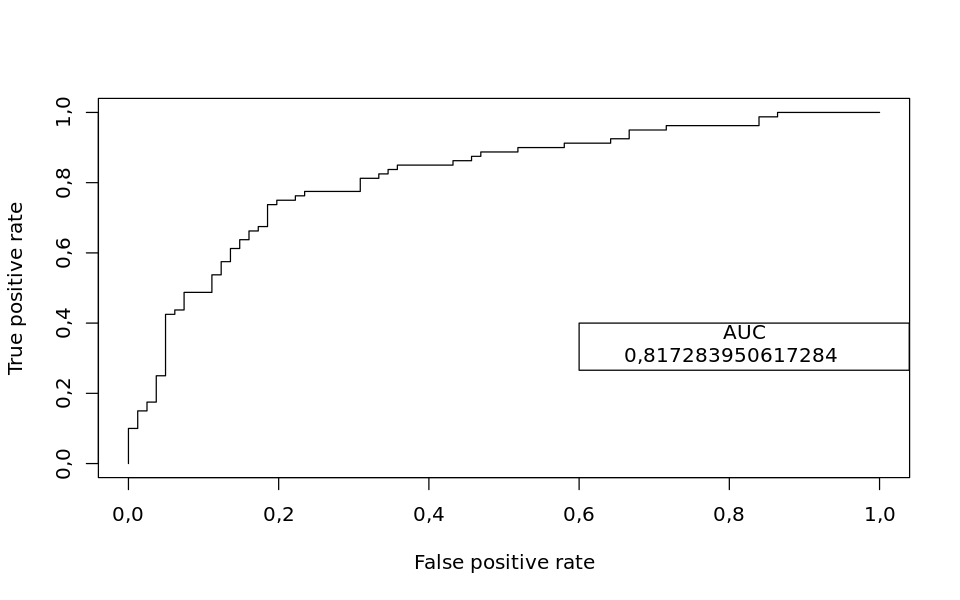

In [115]:
library(ROCR)
# ROC-AUC Curve
ROCPred <- prediction(predict_reg, test_reg$Attrition) 
ROCPer <- performance(ROCPred, measure = "tpr", 
                             x.measure = "fpr")
   
auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
   
# Plotting curve
plot(ROCPer)


legend(.6, .4, auc, title = "AUC", cex = 1)

<h4 style = "line-height: 200%; font-weight: lighter;">
The figure above takes the raw output from the classification predictions and visualizes the area under the curve.In order to calculate the accuracy of the predictions we use thresholding to define “yes” and “no” predictions as the predictions before thresholding are values between 0 and 1, where values closer to 1 indicate “yes” and values close to 0 indicate “no” for attrition.
<h4>

In [116]:
# Threshholding:
predict_reg <- ifelse(predict_reg > 0.5, 1, 0)
   
# Evaluating model accuracy
table(test_reg$Attrition, predict_reg)

missing_classerr <- mean(predict_reg != test_reg$Attrition)
print(paste('Accuracy =', 1 - missing_classerr))

   predict_reg
     0  1
  0 57 24
  1 18 62

[1] "Accuracy = 0,739130434782609"


<h3>Unsupervised learnin - clustering<h3>
<h5>In the following a clustering procedure is performed to designate an n amount of clusters for the data.<h5>

In [117]:
df$scaledAge <- as.numeric(scale(df$Age))
df$scaledIncome <- as.numeric(scale(df$MonthlyIncome))

data <- select(df, scaledAge, scaledIncome)
summary(data)
scaledData <- data
head(scaledData,3)

   scaledAge        scaledIncome    
 Min.   :-2,0715   Min.   :-1,1669  
 1st Qu.:-0,7579   1st Qu.:-0,7629  
 Median :-0,1011   Median :-0,3364  
 Mean   : 0,0000   Mean   : 0,0000  
 3rd Qu.: 0,6651   3rd Qu.: 0,3985  
 Max.   : 2,5260   Max.   : 2,8667  

scaledAge,scaledIncome
"0,44619856","-0,1083127"
"1,32191535","-0,2916193"
"0,00834016","-0,9373347"


<h4>ELBOW GRAPH: Checking the appropriate number of clusters<h4>

<h3>ROC CURVE<h3>
<h5>ROC curve visualization for a visual representation of the classifiers accuracy.<h5>

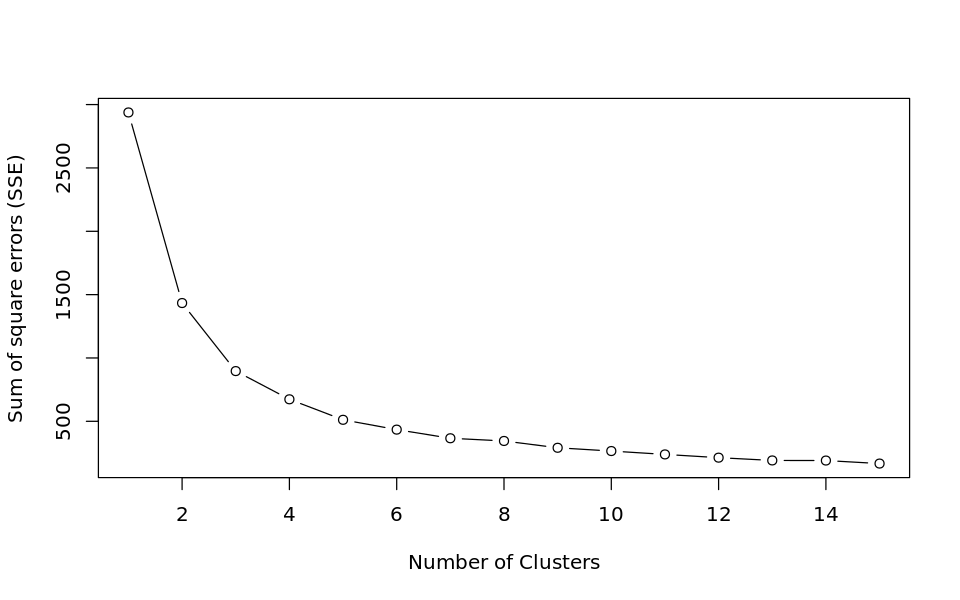

In [118]:
mydata <- scaledData
k_max <- 15
wss <- (nrow(mydata)-1)*sum(apply(mydata, 2, var))
for (i in 2:k_max) wss[i] <- sum(kmeans(mydata, centers=i)$withinss)
plot(1:k_max, wss, type="b", xlab="Number of Clusters",
     ylab="Sum of square errors (SSE)")

<h4>In the following we can se the impact of not scaling the data:<h4>

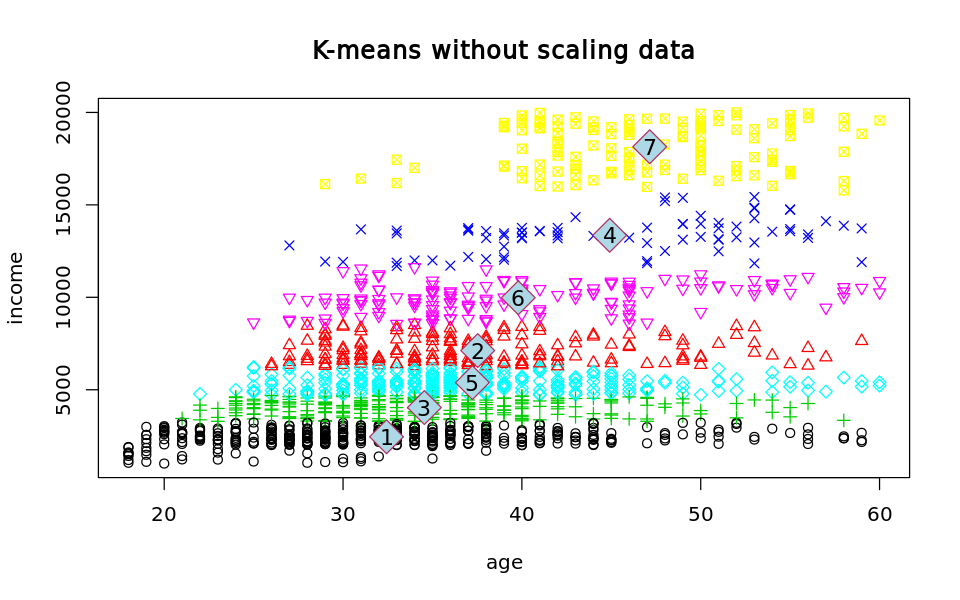

In [119]:
data_unscaled <- select(df, Age, MonthlyIncome)
Kmeans <- kmeans(data_unscaled, 7)

plot(data_unscaled$Age, data_unscaled$MonthlyIncome, col = Kmeans$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = Kmeans$cluster, main = "K-means without scaling data", 
     xlab = "age", ylab = "income")
points(Kmeans$centers[ ,1], Kmeans$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(Kmeans$centers[ ,1], Kmeans$centers[ ,2], cex = 1.1,
     col = 'black', attributes(Kmeans$centers)$dimnames[[1]])


<h4>In the following we can see the impact of scaling the data:<h4>

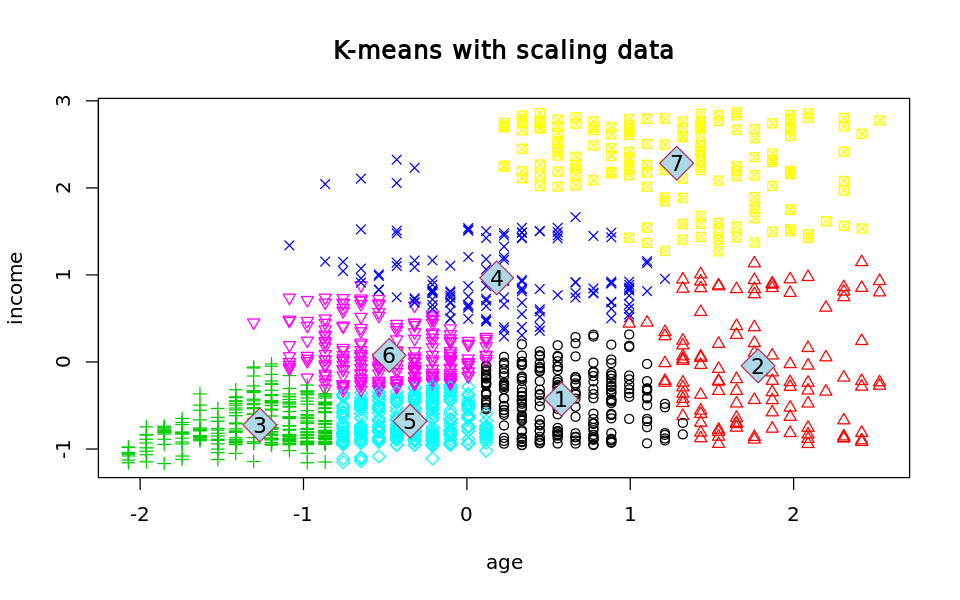

In [120]:
KmeansScaling <- kmeans(scaledData, 7)

plot(scaledData$scaledAge, scaledData$scaledIncome, col = KmeansScaling$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = KmeansScaling$cluster, main = "K-means with scaling data", 
     xlab = "age", ylab = "income")
points(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], cex = 1.1,
     col = 'black', attributes(KmeansScaling$centers)$dimnames[[1]])

<h3>ROC CURVE<h3>
<h5>ROC curve visualization for a visual representation of the classifiers accuracy.<h5>